## **Decision Tree**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Here, we will find out the relation between the columns of the dataset with whether the person will leave the firm or will retain with the firm. We will predict this with the help of Decision tree Algorithm.

In [3]:
df.select_dtypes(include=['int64','float64']).groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [4]:
df1=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [5]:
# Create dummy variables for the 'salary' feature
df2 = pd.get_dummies(df1.salary,prefix='salary').astype(int)
df2.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [6]:
final_df = pd.concat([df1,df2],axis='columns')
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [7]:
X = final_df.drop('salary',axis='columns')
y = df.left

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Decision Tree code**

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [13]:
model.score(X_test,y_test)

0.9316666666666666

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[2170,  113],
       [  92,  625]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

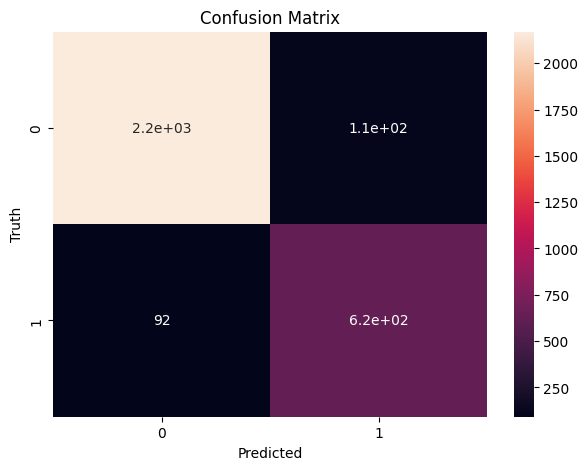

In [28]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2283
           1       0.85      0.87      0.86       717

    accuracy                           0.93      3000
   macro avg       0.90      0.91      0.91      3000
weighted avg       0.93      0.93      0.93      3000

